# Line Normalization (dewarping)

( These notes are based on: https://github.com/tmbdev/ocropy/blob/758e023f808d88e5995af54034c155621eb087b2/OLD/normalization-api.ipynb from 2014 )

The line normalization is performed before the actual text recognition and before the actual training. Therefore, the same line normalization should be used in the recognition as it is used in the training. The line normalization tries to dewarp the line image and normalize its height. Previously different methods were explored, but nowadays the default method should work well. This notes will give some background information.

In [1]:
%pylab inline
from pylab import imshow
from scipy.ndimage import filters,interpolation
import ocrolib
from ocrolib import lineest

#Configure the size of the inline figures
figsize(8,8)

Populating the interactive namespace from numpy and matplotlib


## Generate distorted image

First, we generate a distorted image from an example line. 

(200, 1400)


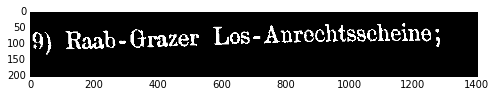

In [2]:
image = 1-ocrolib.read_image_gray("../tests/010030.bin.png")
image = interpolation.affine_transform(image,array([[0.5,0.015],[-0.015,0.5]]),offset=(-30,0),output_shape=(200,1400),order=0)

imshow(image,cmap=cm.gray)
print image.shape

## Load Normalizer and measure the image

# CenterNormalizer
48


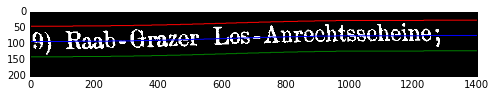

In [3]:
#reload(lineest)
mv = ocrolib.lineest.CenterNormalizer()
mv.measure(image)

print mv.r
plot(mv.center)
plot(mv.center+mv.r)
plot(mv.center-mv.r)
imshow(image,cmap=cm.gray)

## Dewarp

The dewarping of the text line (first image) tries to find the center (blue curve) and then cut out slices with some fixed radius around the center. See this illustration [<img width="50%" src="https://cloud.githubusercontent.com/assets/5199995/25406275/6905c7ce-2a06-11e7-89e0-ca740cd8a21c.png"/>](https://cloud.githubusercontent.com/assets/5199995/25406275/6905c7ce-2a06-11e7-89e0-ca740cd8a21c.png)

(96, 1400)


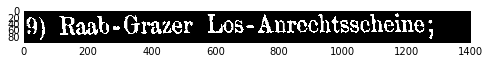

In [4]:
dewarped = mv.dewarp(image)

print dewarped.shape
imshow(dewarped,cmap=cm.gray)

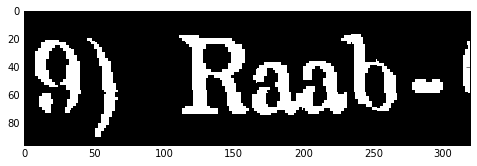

In [5]:
imshow(dewarped[:,:320],cmap=cm.gray,interpolation='nearest')

## Normalize

This will also dewarp the image but additionally normalize the image size (default `x_height` is 48).

(48, 700)


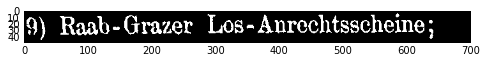

In [6]:
normalized = mv.normalize(image,order=0)

print normalized.shape
imshow(normalized,cmap=cm.gray)